## Plot temperature anomaly time series for Colorado using NCEI data (Figure 2.3)

### Imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

### read data from NCEI

In [2]:
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/5/tavg/12/12/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)

### different baseline (1971-2000)
data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/5/tavg/12/12/1895-2023.csv?base_prd=true&begbaseyear=1971&endbaseyear=2000", skiprows=4)

## pull out just the year (first four digits)
data['Date'] = data['Date'].astype(str).str[0:4].astype(int)
data = data.set_index("Date")

data

,Value,Anomaly
Date,,
1895,42.4,-2.7
1896,44.9,-0.2
1897,44.0,-1.1
1898,42.7,-2.4
1899,43.2,-1.9
...,...,...
2018,47.2,2.1
2019,45.3,0.2
2020,47.3,2.2


### calculate Theil-Sen slopes

In [3]:
### calculate some slopes
X = data.reset_index().index  ### index going from 0 to length of vector
res = stats.theilslopes(data.Anomaly, X, 0.90, method='separate')  ## theil-sen
lsq_res = stats.linregress(X, data.Anomaly)  ## least squares

### and for 1980-2022
data_sub = data.loc[1980:2022]
X_sub = data_sub.reset_index().index
res_sub = stats.theilslopes(data_sub.Anomaly, X_sub, 0.90, method='separate')  ## theil-sen
lsq_res_sub = stats.linregress(X_sub, data_sub.Anomaly)  ## least squares

### plot anomaly time series, with Theil-Sen trends

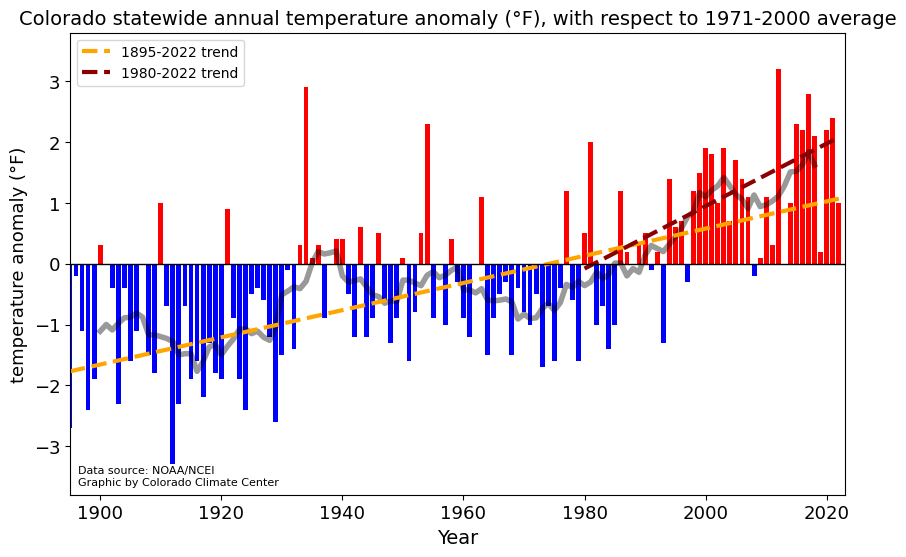

In [4]:
### and add Theil-Sen trend to the plot, following https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.theilslopes.html

fig, ax = plt.subplots(figsize=(10,6))

clrs = ['blue' if (y <= 0) else 'red' for y in data['Anomaly'] ]

p = plt.bar(data.index, data['Anomaly'], linewidth=3, color=clrs)

plt.xlim(1895, 2023)
plt.ylim(-3.8,3.8)
plt.xlabel('Year',fontsize=14)

### plot 10-year running mean
rollmean = data['Anomaly'].rolling(10,center=True).mean()
plt.plot(rollmean,lw=4, alpha=0.4, color='black')

### plot the slopes
ax.plot(data.index, res[1] + res[0] * X, color='orange', lw=3, linestyle='dashed', label='1895-2022 trend')

## and the 1980-2021 slopes
ax.plot(data_sub.index, res_sub[1] + res_sub[0] * X_sub, color='darkred', lw=3, linestyle='dashed', label='1980-2022 trend')

plt.ylabel('temperature anomaly (°F)',fontsize=13)
plt.title('Colorado statewide annual temperature anomaly (°F), with respect to 1971-2000 average',fontsize=14)

plt.axhline(0, linewidth=1, color='black')
plt.tick_params(labelsize=13)

plt.text(0.01, 0.04, 'Data source: NOAA/NCEI\nGraphic by Colorado Climate Center', 
         horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=8)

ax.legend()

plt.show()

fig.savefig('CO_statewide_Tanom_all.png',dpi=300,facecolor='white',transparent=False,bbox_inches='tight')

